In [1]:
from torch.utils.data import DataLoader
from data_analysis_utils import spher_to_cart
from data_analysis_utils import AlbumDataset
from data_analysis_utils import models
from data_analysis_utils import ModelEval
from pathlib import Path

VERBOSE = True

# For old, linear, cartesian, non-4th station model:
# checkpoints_path = Path('/data/condor_shared/users/ssued/RNOG_Image_Builder/machine_learning/vertices_RNO4/model_cutoff_dataset_unnorm_labels_cartesian/experiments/exp_RNO_four_2_1_0_linear_bn128_tr495_te124_lfn-MSELoss_opt-Adam_hiddenu-32_lr-0.001_lFactor-0.1_batchnorm-True_cartesian_transform-True/checkpoints')
# For old, linear, cartesian, working (RNO_four_late_linear_merge)
#checkpoints_path = Path('/data/condor_shared/users/ssued/RNOG_Image_Builder/machine_learning/vertices_RNO4/model_cutoff_dataset_unnorm_labels_cartesian/experiments/exp_RNO_four_late_linear_merge_bn128_tr495_te124_lfn-MSELoss_opt-Adam_hiddenu-32_lr-0.001_lFactor-0.1_cartesian_transform-True/checkpoints/checkpoint_e1000.pth')
checkpoints_path = Path('/data/condor_shared/users/ssued/RNOG_Image_Builder/machine_learning/vertices_RNO4/model_new_architecture/experiments/exp_RNO_four_late_non_linear_merge_bn128_tr495_te124_lfn-MSELoss_opt-Adam_hiddenu-32_lr-0.001_lFactor-0.1_cartesian_transform-True/checkpoints')
album_path = '/data/i3store/users/ssued/albums/RNO_album_11_03_2025_20k_unorm/album_RNO4.hdf5'

# album_normalization_factor = [0.494392067193985,1230.7686767578125,15.53587818145752,1235.851318359375,-852.8795166015625,445.83966064453125]

if VERBOSE:
    print('Creating dataset...')

album = AlbumDataset(album_path, transform = None, target_transform=spher_to_cart,normalize_labels=True,
                     normalization_factors=[0.494392067193985,1230.7686767578125,15.53587818145752,1235.851318359375,-852.8795166015625,445.83966064453125])

if VERBOSE:
    print('Creating dataloader...')
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

if VERBOSE:
    print('Initializing model...')
test_model = models.RNO_four_late_non_linear_merge(input_shape=1,
                          hidden_units=32,
                          leak_factor=0.1,
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

if VERBOSE:
    print('Initializing ModelEval...')
model_results = ModelEval(test_model,album,data_loader,checkpoint_path=checkpoints_path,num_samples=1000,store_images=True)

/data/condor_shared/users/ssued/mlvenv/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/data/condor_shared/users/ssued/mlvenv/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happ

Creating dataset...
Setting coordinates to cartesian.
Utilizing inputted normalization statistics
  x: mean=0.4944, std=1230.7687
  y: mean=15.5359, std=1235.8513
  z: mean=-852.8795, std=445.8397
[0.494392067193985,1230.7686767578125,15.53587818145752,1235.851318359375,-852.8795166015625,445.83966064453125]
Creating dataloader...
Initializing model...
Initializing ModelEval...
Checkpoint path provided is a directory: /data/condor_shared/users/ssued/RNOG_Image_Builder/machine_learning/vertices_RNO4/model_new_architecture/experiments/exp_RNO_four_late_non_linear_merge_bn128_tr495_te124_lfn-MSELoss_opt-Adam_hiddenu-32_lr-0.001_lFactor-0.1_cartesian_transform-True/checkpoints, will load latest checkpoint.
Loading checkpoint: checkpoint_e550.pth...
Checkpoint Loaded!
Guesses and targets will be denormalized during processing.
Testing Model... (1000/1000 samples)


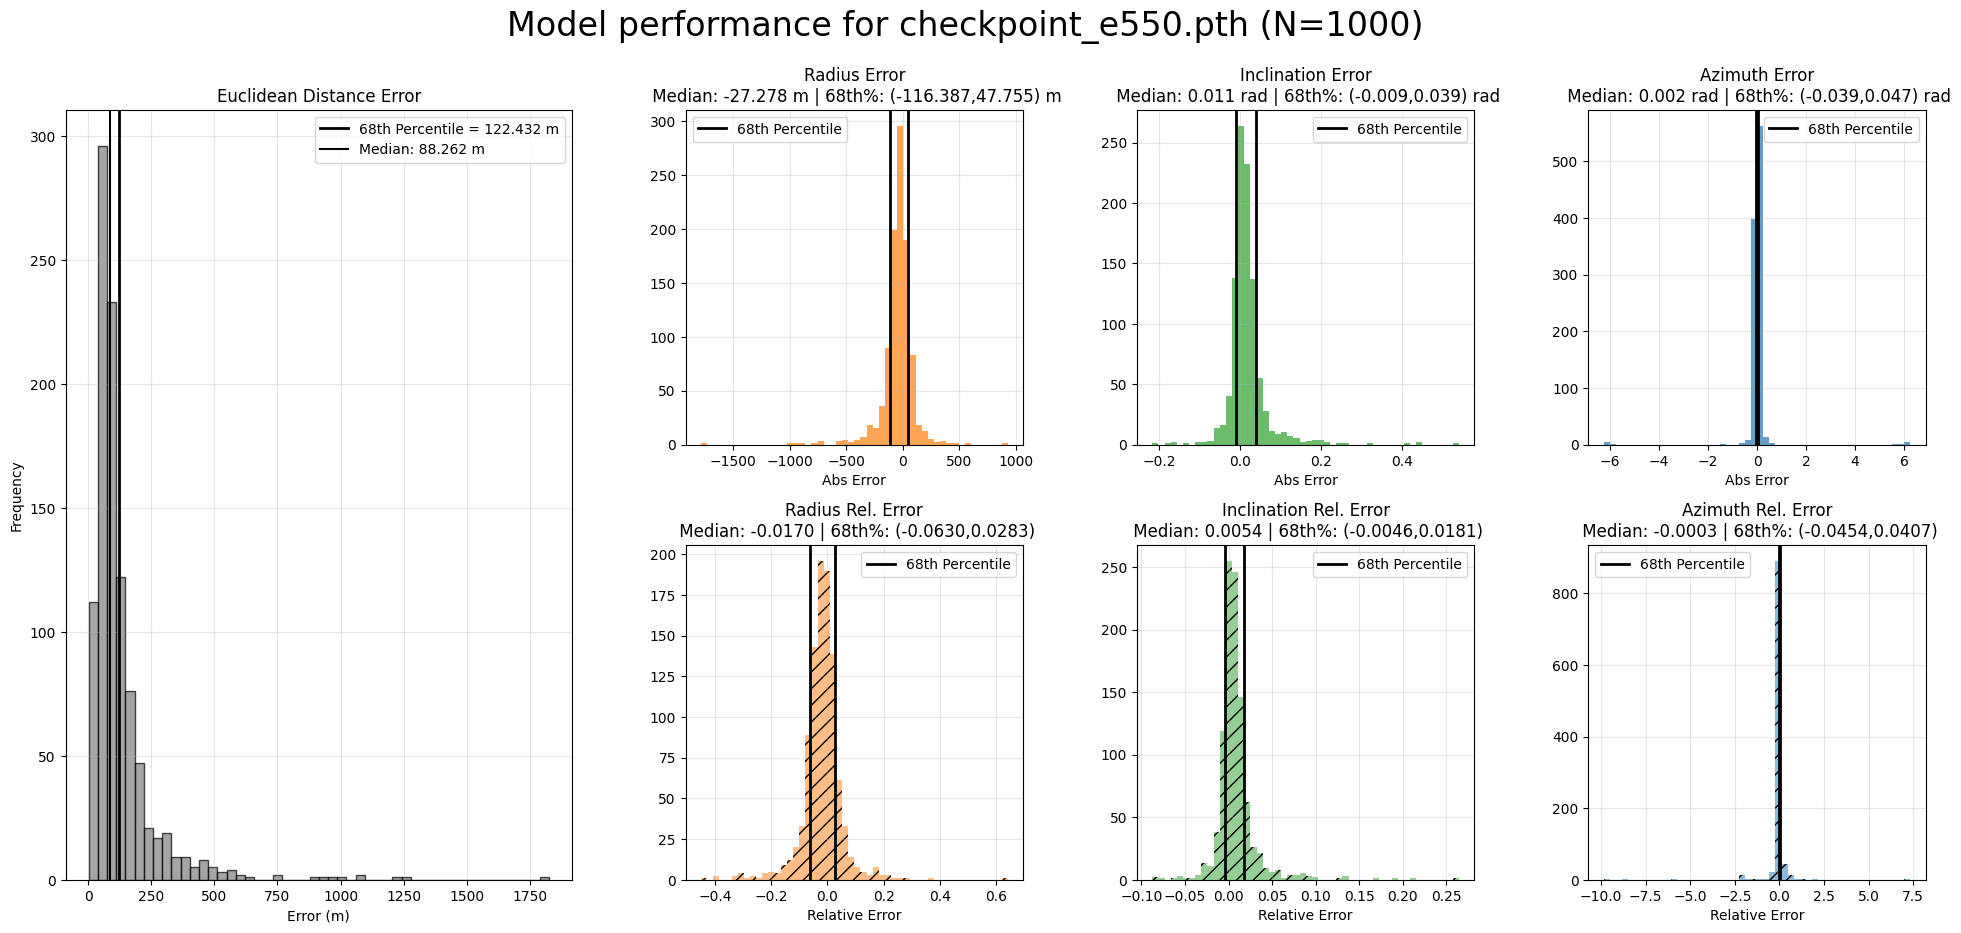

In [2]:
model_results.plot_vertex_analysis()